# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
import pandas as pd
import numpy as np

# Load the Airbnb dataset
airbnb_df = pd.read_csv("./data/airbnb_hw.csv")

# 1. Cleaning the Price Variable
airbnb_df['Price'] = airbnb_df['Price'].replace('[\$,]', '', regex=True).astype(float)
num_missing_price = airbnb_df['Price'].isna().sum()

print(f"Missing values in Price column: {num_missing_price}")

# Load the Minnesota police dataset
mn_police_df = pd.read_csv("./data/mn_police_use_of_force.csv")

# 2. Cleaning subject_injury
mn_police_df['subject_injury'] = mn_police_df['subject_injury'].str.strip().str.lower()
mn_police_df['subject_injury'] = mn_police_df['subject_injury'].replace(
    {'yes': 'Yes', 'no': 'No', np.nan: 'Unknown'}
)

# Calculate missing proportion
missing_subject_injury = mn_police_df['subject_injury'].value_counts(normalize=True).get('Unknown', 0)

# Cross-tabulation with force_type
injury_force_crosstab = pd.crosstab(mn_police_df['subject_injury'], mn_police_df['force_type'])

print(f"Proportion of missing subject_injury: {missing_subject_injury}")
print("Cross-tabulation of subject_injury and force_type:")
print(injury_force_crosstab)

# Load the pretrial dataset
justice_df = pd.read_parquet("./data/justice_data.parquet")

# 3. Cleaning WhetherDefendantWasReleasedPretrial
justice_df['WhetherDefendantWasReleasedPretrial'] = justice_df['WhetherDefendantWasReleasedPretrial'].replace(
    {'Yes': 1, 'No': 0, np.nan: np.nan}
)

# 4. Cleaning ImposedSentenceAllChargeInContactEvent based on SentenceTypeAllChargesAtConvictionInContactEvent
justice_df['ImposedSentenceAllChargeInContactEvent'] = justice_df['ImposedSentenceAllChargeInContactEvent'].fillna(
    justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'].map(
        lambda x: 'No Sentence' if x == 'Acquitted' else np.nan
    )
)

# Save cleaned datasets
airbnb_df.to_csv("./data/cleaned_airbnb_hw.csv", index=False)
mn_police_df.to_csv("./data/cleaned_mn_police_use_of_force.csv", index=False)
justice_df.to_parquet("./data/cleaned_justice_data.parquet")


<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_5447/2306142528.py:8: SyntaxWarning: invalid escape sequence '\$'
  airbnb_df['Price'] = airbnb_df['Price'].replace('[\$,]', '', regex=True).astype(float)


Missing values in Price column: 0
Proportion of missing subject_injury: 0.7619342359767892
Cross-tabulation of subject_injury and force_type:
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Unknown             2          7051               1421        0   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Unknown                        27                 74           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
count    5456.000000
mean     1991.925037
std        24.079803
min      1940.000000
25%      1969.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64


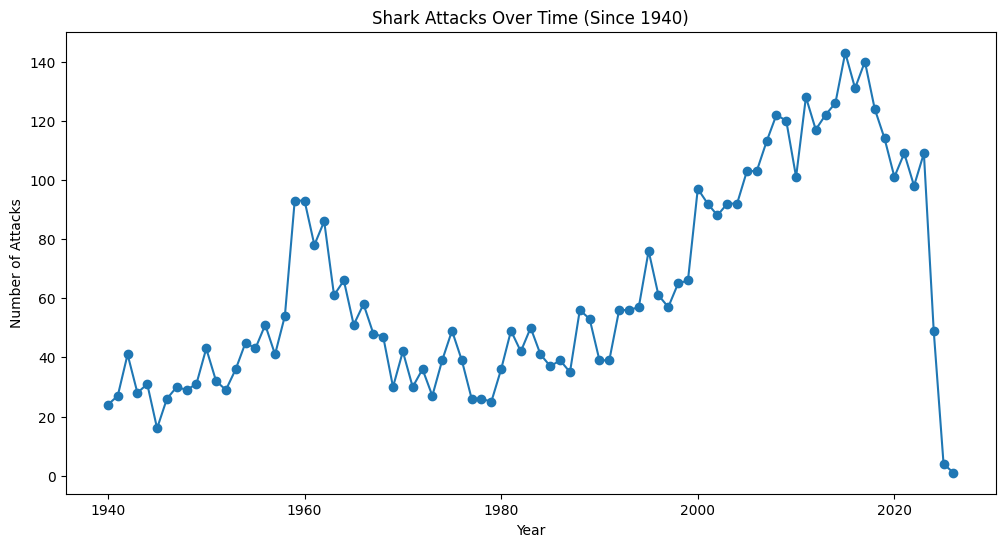

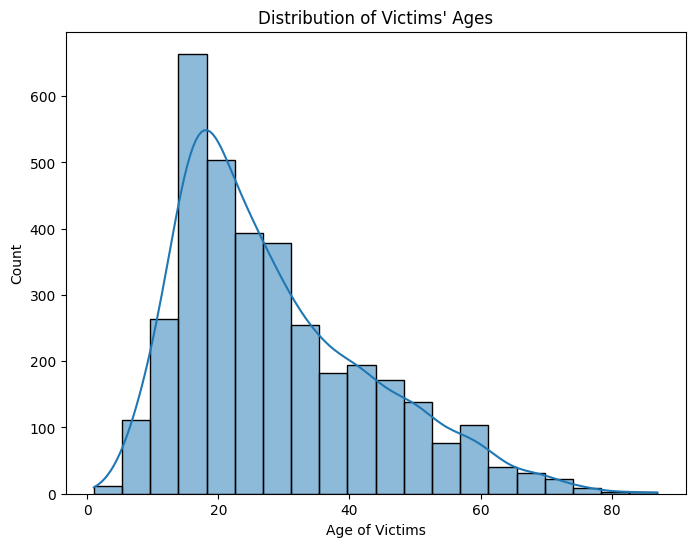

Proportion of male victims: 78.74%
Proportion of unprovoked attacks: 74.29%
Unprovoked Attacks by Gender:
Type   Provoked  Unknown  Unprovoked
Sex                                 
F            28       78         600
LLI           0        0           1
M           446      539        3311
M X 2         0        1           0
Fatality Rate by Attack Type:
Type     Provoked   Unknown  Unprovoked
Fatal                                  
N        0.957529  0.413559     0.81964
Unknown  0.017375  0.451977     0.01283
Y        0.025097  0.134463     0.16753
Fatality Rate by Gender:
Sex             F  LLI         M  M X 2
Fatal                                  
N        0.793201  1.0  0.774209    0.0
Unknown  0.083569  0.0  0.074953    1.0
Y        0.123229  0.0  0.150838    0.0
Proportion of attacks by white sharks: 12.04%
Shark attack analysis completed.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the shark attack dataset
file_path = "./data/GSAF5.xls"
shark_df = pd.read_excel(file_path)
# 1. Drop empty columns
shark_df.dropna(axis=1, how='all', inplace=True)
print(shark_df.columns)

# 2. Clean the Year variable
shark_df['Year'] = pd.to_numeric(shark_df['Year'], errors='coerce')
shark_df = shark_df[shark_df['Year'] >= 1940]  # Filter attacks since 1940

# Describe range of years
year_summary = shark_df['Year'].describe()
print(year_summary)

# Plot the number of attacks per year
plt.figure(figsize=(12, 6))
shark_df['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks Over Time (Since 1940)")
plt.show()

# 3. Clean the Age variable
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')

# Plot histogram of ages
plt.figure(figsize=(8, 6))
sns.histplot(shark_df['Age'].dropna(), bins=20, kde=True)
plt.xlabel("Age of Victims")
plt.ylabel("Count")
plt.title("Distribution of Victims' Ages")
plt.show()

# 4. Proportion of male victims
shark_df['Sex'] = shark_df['Sex'].str.strip().str.upper()  # Standardize column
male_proportion = (shark_df['Sex'] == 'M').mean()
print(f"Proportion of male victims: {male_proportion:.2%}")

# 5. Clean the Type variable
shark_df['Type'] = shark_df['Type'].str.strip().str.lower()
shark_df['Type'] = shark_df['Type'].map(lambda x: 'Unprovoked' if 'unprovoked' in str(x) 
                                        else 'Provoked' if 'provoked' in str(x) 
                                        else 'Unknown')

# Proportion of unprovoked attacks
unprovoked_proportion = (shark_df['Type'] == 'Unprovoked').mean()
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2%}")

# 6. Clean Fatal variable
shark_df['Fatal'] = shark_df['Fatal Y/N'].str.strip().str.upper().map(lambda x: 'Y' if x == 'Y' 
                                                                      else 'N' if x == 'N' 
                                                                      else 'Unknown')

# 7. Analyze unprovoked attacks by gender
unprovoked_by_gender = pd.crosstab(shark_df['Sex'], shark_df['Type'])
print("Unprovoked Attacks by Gender:")
print(unprovoked_by_gender)

# 8. Fatality rate by attack type
fatal_by_type = pd.crosstab(shark_df['Fatal'], shark_df['Type'], normalize='columns')
print("Fatality Rate by Attack Type:")
print(fatal_by_type)

# 9. Fatality rate by gender
fatal_by_gender = pd.crosstab(shark_df['Fatal'], shark_df['Sex'], normalize='columns')
print("Fatality Rate by Gender:")
print(fatal_by_gender)

# 10. Proportion of attacks by white sharks
shark_df['Species '] = shark_df['Species '].str.lower().str.strip()
shark_df['White_Shark'] = shark_df['Species '].str.contains("white shark", na=False)
white_shark_proportion = shark_df['White_Shark'].mean()
print(f"Proportion of attacks by white sharks: {white_shark_proportion:.2%}")



**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  The paper addresses the issue of data cleaning, specifically focusing on data tidying. Tidy datasets are structured in a way that makes manipulation, modeling, and visualization easier. The paper proposes a framework where each variable is a column, each observation is a row, and each type of observational unit is a table. This structure simplifies tidying messy datasets and developing tools that input and output tidy datasets​.
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  The tidy data standard is designed to make initial data cleaning easier, reduce the need for constant data translation between tools, and allow for seamless integration between different data analysis tools. It facilitates exploratory data analysis and simplifies tool development by enforcing a consistent structure​.
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  - This means that tidy datasets follow a standard structure, while messy datasets can be disorganized in numerous ways, making them more challenging to work with​.
  - This highlights that, while defining variables and observations in a specific dataset is usually straightforward, doing so across different datasets or domains is complex due to varying contexts and interpretations.
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  - Values are the actual data points within a dataset.
  - Variables contain values that measure the same underlying attribute across observations.
  - Observations are the sets of values collected on the same unit.​
  5. How is "Tidy Data" defined in section 2.3?
  - Each variable forms a column.
  - Each observation forms a row.
  - Each type of observational unit forms a table
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  - Column headers are values, not variable names.
  - Multiple variables are stored in one column.
  - Variables are stored in both rows and columns.
  - Multiple types of observational units are stored in the same table.
  - A single observational unit is stored in multiple tables.  
      Table 4 is messy because the income levels are column headers rather than values, requiring restructuring (melting) to turn them into a variable.
  - Melting a dataset refers to transforming it from a wide format to a long format, where multiple columns representing the same variable are collapsed into two columns.
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  Table 11 is messy because it stores variables across both rows and columns, making it difficult to analyze efficiently. Table 12 is tidy because it has been melted
  - The element column has been separated into two variables: sex and age.
  - Each row now represents a single observation, making the dataset easier to manipulate and analyze.
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
  - The chicken-and-egg problem refers to the fact that while tidy data makes analysis easier, there are few general principles guiding its design, making it difficult to establish a universal standard.
  - Wickham hopes that future research will integrate statistical, cognitive, and human-computer interaction principles to refine data tidying strategies. He also suggests developing more tools that can automatically adapt between different data formats, such as dataframe-tidy and array-tidy formats.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?